In [1]:
import re
import pandas as pd
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
f = open("..\..\WhatsApp Chat with Strategy 101 Community 25.txt", 'r',encoding='utf-8')
data = f.read()

In [3]:
# preprocess the data to get messages

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern, data)[1:]

In [4]:
# Get usernames from messages
users = []
msg = []

for message in messages:
    reply = re.split('([\w\W]+?):\s', message)
    # print(reply)
    if reply[1:]:
        users.append(reply[1])
        msg.append("".join(reply[2:]))
    else:
        users.append('group notification')
        msg.append(reply[0])

In [5]:
dates = re.findall(pattern, data)

In [6]:
df = pd.DataFrame({'datetime':dates, 'User':users, 'Message':msg})
# convert dates type
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%y, %H:%M - ')

df.head(10)

,datetime,User,Message
0,2021-09-16 22:29:00,group notification,Messages and calls are end-to-end encrypted. N...
1,2021-09-14 18:50:00,group notification,"+91 94003 00396 created group ""Strategy 101 Co..."
2,2021-09-16 22:29:00,group notification,You joined using this group's invite link\n
3,2021-09-16 23:16:00,group notification,+91 93112 01941 joined using this group's invi...
4,2021-09-17 00:31:00,group notification,+91 96549 30928 joined using this group's invi...
5,2021-09-17 08:54:00,group notification,+91 85270 91101 joined using this group's invi...
6,2021-09-17 10:11:00,group notification,"+91 85957 03445 added +91 79037 65697, +91 880..."
7,2021-09-17 13:15:00,group notification,+91 89203 78931 joined using this group's invi...
8,2021-09-17 13:49:00,group notification,+91 99998 92034 joined using this group's invi...
9,2021-09-17 14:29:00,group notification,+91 84597 54119 joined using this group's invi...


In [7]:
df.shape

(461, 3)

In [8]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute

df.head()

,datetime,User,Message,year,month,day,hour,minute
0,2021-09-16 22:29:00,group notification,Messages and calls are end-to-end encrypted. N...,2021,September,16,22,29
1,2021-09-14 18:50:00,group notification,"+91 94003 00396 created group ""Strategy 101 Co...",2021,September,14,18,50
2,2021-09-16 22:29:00,group notification,You joined using this group's invite link\n,2021,September,16,22,29
3,2021-09-16 23:16:00,group notification,+91 93112 01941 joined using this group's invi...,2021,September,16,23,16
4,2021-09-17 00:31:00,group notification,+91 96549 30928 joined using this group's invi...,2021,September,17,0,31


In [9]:
# users in the chat
user_list = df['User'].unique().tolist()


In [10]:
# Dropping Non-messages
df.drop(df[df['Message'] == '<Media omitted>\n'].index, axis = 0, inplace=True)

df.drop(df[df['User'] == 'group notification'].index, axis = 0, inplace=True)

df.drop(df[df['Message'] == 'This message was deleted\n'].index, axis = 0, inplace=True)


df.shape

(167, 8)

In [11]:
# Word count of messages
all_words = []
for message in df['Message']:
    all_words.extend(message.split())

word_count = len(all_words)
word_count

12071

In [12]:
df

,datetime,User,Message,year,month,day,hour,minute
49,2021-09-21 18:14:00,+91 85957 03445,"How I Think About My Career Growth (Think Big,...",2021,September,21,18,14
52,2021-09-22 08:14:00,+91 85957 03245,they are a failure\n,2021,September,22,8,14
53,2021-09-22 08:14:00,+91 85957 03245,because of irritation and bad habits\n,2021,September,22,8,14
54,2021-09-22 08:14:00,+91 85957 03245,so solve problems\n,2021,September,22,8,14
55,2021-09-22 08:14:00,+91 85957 03245,don't be sorry \n,2021,September,22,8,14
...,...,...,...,...,...,...,...,...
449,2022-07-09 13:54:00,+91 98112 98080,Do you want to land a *core engineering job* i...,2022,July,9,13,54
451,2022-07-14 12:32:00,+91 85957 03445,The IMPACT Project is hiring!\n\n*About Us*\nW...,2022,July,14,12,32
454,2022-07-20 14:39:00,+91 85957 03445,"Career Edge, an ISB Alumni led career guidance...",2022,July,20,14,39
457,2022-07-21 23:08:00,+91 95993 73181,*Eatu* - An early age startup is hiring Graphi...,2022,July,21,23,8


In [13]:
# No. of emojis
emoji_list = []
for message in df['Message']:
    for char in message:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)
len(emoji_list)

380

In [14]:
# No. of links
from urlextract import URLExtract
extractor = URLExtract()

links = []
for message in df['Message']:
    links.extend(extractor.find_urls(message))

len(links)

229

<AxesSubplot:>

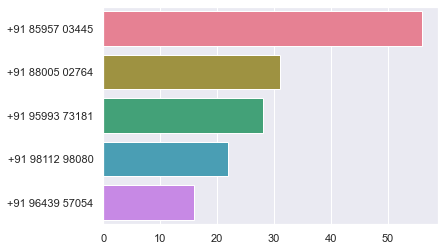

In [15]:
# Most active users in group
most_active = df['User'].value_counts().head(5)

sns.barplot(y = most_active.index, x = most_active.values, palette="husl")

In [16]:
per_active = round((df['User'].value_counts() / df.shape[0]) * 100, 2).rename('percentage active')

per_active

+91 85957 03445    33.53
+91 88005 02764    18.56
+91 95993 73181    16.77
+91 98112 98080    13.17
+91 96439 57054     9.58
+91 94003 00396     5.39
+91 85957 03245     2.40
+91 98107 56723     0.60
Name: percentage active, dtype: float64

In [17]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')

words = []

for message in df['Message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

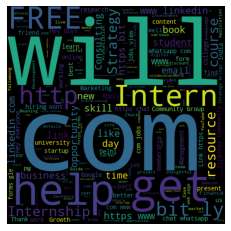

In [18]:
wc = WordCloud(stopwords = stop_words, width=500, height=500, background_color='black')
wc_gen = wc.generate(df['Message'].str.cat(sep=' '))
plt.axis('off')
plt.imshow(wc_gen);

In [19]:
from collections import Counter

most_common_df = pd.DataFrame(Counter(words).most_common(20))
pd.DataFrame(Counter(words).most_common(20)).rename(columns = {0:'words', 1:'times used'})

,words,times used
0,-,150
1,strategy,77
2,101,73
3,will,52
4,get,48
5,community,44
6,&,39
7,■,39
8,hey,36
9,case,35


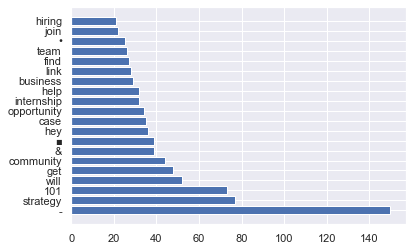

In [20]:
fig, ax = plt.subplots()
plt.style.use('seaborn-dark-palette')

ax.barh(most_common_df[0], most_common_df[1]);

In [21]:
emoji_df = pd.DataFrame(Counter(emoji_list).most_common(len(Counter(emoji_list)))).rename(columns = {0:'emoji', 1:'count'})

In [22]:
emoji_df['percentage'] = round(emoji_df['count'] / emoji_df['count'].sum() * 100, 2)

emoji_df

,emoji,count,percentage
0,📎,118,31.05
1,👉,24,6.32
2,➡,21,5.53
3,👥,16,4.21
4,💯,13,3.42
...,...,...,...
58,🎭,1,0.26
59,🔻,1,0.26
60,❤,1,0.26
61,⚠,1,0.26


In [23]:
df['month_num'] = df['datetime'].dt.month

In [24]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['Message'].reset_index()

timeline

,year,month_num,month,Message
0,2021,9,September,12
1,2021,10,October,25
2,2021,11,November,7
3,2021,12,December,20
4,2022,1,January,14
5,2022,2,February,12
6,2022,3,March,17
7,2022,4,April,19
8,2022,5,May,20
9,2022,6,June,7


In [25]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

In [26]:
timeline['time'] = time
timeline

,year,month_num,month,Message,time
0,2021,9,September,12,September-2021
1,2021,10,October,25,October-2021
2,2021,11,November,7,November-2021
3,2021,12,December,20,December-2021
4,2022,1,January,14,January-2022
5,2022,2,February,12,February-2022
6,2022,3,March,17,March-2022
7,2022,4,April,19,April-2022
8,2022,5,May,20,May-2022
9,2022,6,June,7,June-2022


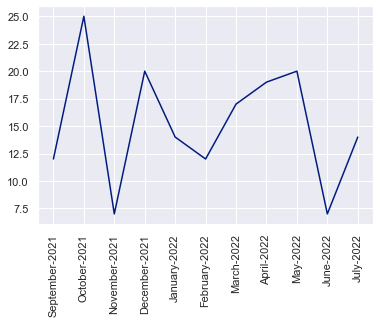

In [27]:
# Monthly timeline
plt.plot(timeline['time'], timeline['Message'])
plt.xticks(rotation = 'vertical');

In [28]:
df['day_name'] = df['datetime'].dt.day_name()

In [29]:
df['day_name'].value_counts()

Thursday     32
Saturday     32
Wednesday    23
Tuesday      22
Friday       21
Sunday       19
Monday       18
Name: day_name, dtype: int64

In [30]:
period = []
for hour in df['hour']:
    if hour == 23:
        period.append(str(hour) + '-' + str('00'))
    else:
        period.append(str(hour) + '-' + str(hour+1))

In [31]:
df['period'] = period

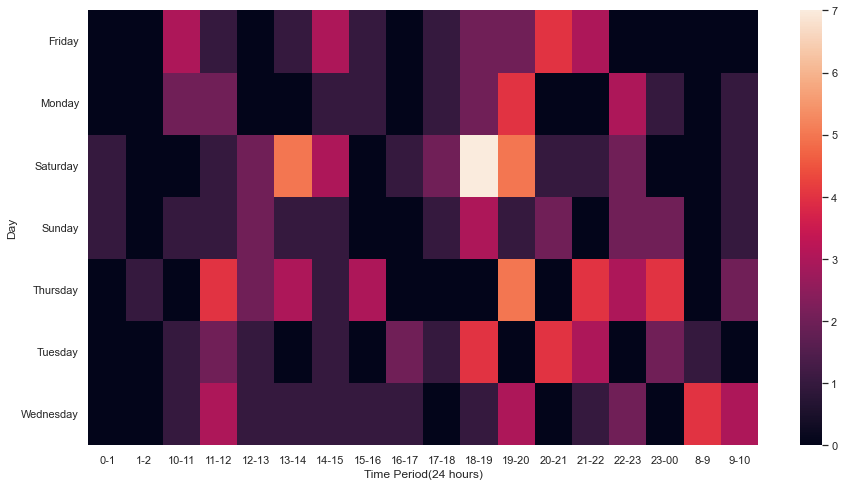

In [32]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.pivot_table(index='day_name', columns = 'period', values = 'Message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.xlabel('Time Period(24 hours)')
plt.ylabel('Day')
plt.show()

In [33]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments=SentimentIntensityAnalyzer()
df["positive"]=[sentiments.polarity_scores(i)["pos"] for i in df["Message"]]
df["negative"]=[sentiments.polarity_scores(i)["neg"] for i in df["Message"]]
df["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in df["Message"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rashm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
def sentiment(d):
    if d["positive"] >= d["negative"] and d["positive"] >= d["neutral"]:
        return 1
    if d["negative"] >= d["positive"] and d["negative"] >= d["neutral"]:
        return -1
    if d["neutral"] >= d["positive"] and d["neutral"] >= d["negative"]:
        return 0

df['sentiment'] = df.apply(lambda row: sentiment(row), axis=1)
df

,datetime,User,Message,year,month,day,hour,minute,month_num,day_name,period,positive,negative,neutral,sentiment
49,2021-09-21 18:14:00,+91 85957 03445,"How I Think About My Career Growth (Think Big,...",2021,September,21,18,14,9,Tuesday,18-19,0.178,0.000,0.822,0
52,2021-09-22 08:14:00,+91 85957 03245,they are a failure\n,2021,September,22,8,14,9,Wednesday,8-9,0.000,0.623,0.377,-1
53,2021-09-22 08:14:00,+91 85957 03245,because of irritation and bad habits\n,2021,September,22,8,14,9,Wednesday,8-9,0.000,0.630,0.370,-1
54,2021-09-22 08:14:00,+91 85957 03245,so solve problems\n,2021,September,22,8,14,9,Wednesday,8-9,0.345,0.491,0.165,-1
55,2021-09-22 08:14:00,+91 85957 03245,don't be sorry \n,2021,September,22,8,14,9,Wednesday,8-9,0.379,0.000,0.621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2022-07-09 13:54:00,+91 98112 98080,Do you want to land a *core engineering job* i...,2022,July,9,13,54,7,Saturday,13-14,0.170,0.000,0.830,0
451,2022-07-14 12:32:00,+91 85957 03445,The IMPACT Project is hiring!\n\n*About Us*\nW...,2022,July,14,12,32,7,Thursday,12-13,0.143,0.000,0.857,0
454,2022-07-20 14:39:00,+91 85957 03445,"Career Edge, an ISB Alumni led career guidance...",2022,July,20,14,39,7,Wednesday,14-15,0.151,0.000,0.849,0
457,2022-07-21 23:08:00,+91 95993 73181,*Eatu* - An early age startup is hiring Graphi...,2022,July,21,23,8,7,Thursday,23-00,0.091,0.000,0.909,0


In [35]:
def create_wordcloud(df,k):
    temp = df.copy()
    # Dimensions of wordcloud
    wc = WordCloud(stopwords = stop_words, width=500,height=500,min_font_size=10,background_color='white')
    temp['Message'] = temp['Message'][temp['sentiment'] == k]
    df_wc = wc.generate(temp['Message'].str.cat(sep=" "))
    return df_wc

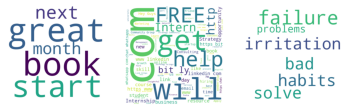

In [36]:
# Wordcloud

fig, axs = plt.subplots(1,3)


axs[0].imshow(create_wordcloud(df,1))
axs[0].axis('off')
axs[0].set_xlabel('positive')

axs[1].imshow(create_wordcloud(df,0))
axs[1].set_xlabel('neutral')
axs[1].axis('off')

axs[2].imshow(create_wordcloud(df,-1))
axs[2].set_xlabel('negative')
axs[2].axis('off')

plt.show()

In [37]:
# Most Positive Users
df['User'][(df['sentiment'] == 1).index].value_counts().head(10)

+91 85957 03445    56
+91 88005 02764    31
+91 95993 73181    28
+91 98112 98080    22
+91 96439 57054    16
+91 94003 00396     9
+91 85957 03245     4
+91 98107 56723     1
Name: User, dtype: int64